In [1]:
from sklearn.externals import joblib 
# pickled binary file 형태로 저장된 객체를 로딩한다 
file_name = '1000_500_200_100_voting_model.pkl' 
votigC = joblib.load(file_name) 

In [54]:
import requests
import json
from DbConn import *
from datetime import datetime, timedelta

def week_dataframe(day):
    db = DbConn()
    
    select_query = """
    select moviecd, audicnt 
    from boxoffice2  
    where  movienm like '%기생충%' and opendt +:day = dailydate and dailydate > TO_DATE('19/01/01', 'YY/mm/dd') and dailydate > TO_DATE('03/01/01', 'YY/mm/dd')  
    order by moviecd
    """
    params = {"day":day}
    select_result = db.execute(select_query,params)

    print("첫주 작업 완료. -----")
    db.disconnect()
    return  select_result

day = 1

def movie2_dataframe():
    db = DbConn()
    
    select_query = """
    select moviecd,  max_audiacc, actors1_max, actors2_max, actors3_max, actors4_max,
    
    prod_max,
    
    director_max
    
    from movie2
    where movienm like '%극한직업%' and opendt > TO_DATE('19/01/01', 'YY/mm/dd') and opendt > TO_DATE('03/01/01', 'YY/mm/dd') and max_audiacc > 1000000
    order by moviecd
    """
    select_result = db.execute(select_query)

    print("누적 작업 완료. -----")
    db.disconnect()
    return  select_result


def screen_dataframe():
    db = DbConn()
    
    select_query = """
    select moviecd, scrncnt
    
    from boxoffice2
    where dailydate = opendt
    order by moviecd
    """
    select_result = db.execute(select_query)

    print("누적 작업 완료. -----")
    db.disconnect()
    return  select_result

# def max_dataframe():
#     db = DbConn()
    
#     select_query = """
#     select moviecd,  max(audiacc)
#     from boxoffice 
#     group by moviecd
#     order by moviecd
#     """
#     select_result = db.execute(select_query)

#     print("누적 작업 완료. -----")
#     db.disconnect()
#     return  select_result

# print(week_dataframe(13))

print(movie2_dataframe())


누적 작업 완료. -----
[(20182530, 16252575, 17583608, 16252575, 16252575, 16252575, 16252575, 16252575)]


In [55]:
import pandas as pd
df_week= []
for i in range(0,day):
    df_week_column_name = ['mnumber', 'dpeople+'+str(i)]
    df_week.append( pd.DataFrame(week_dataframe(i), columns=df_week_column_name) )



첫주 작업 완료. -----


In [56]:
movie2_dataframe
df_movie2_column_name = ['mnumber', 'sum_total_people', 'actors1_max', 'actors2_max', 'actors3_max', 'actors4_max',
   
    
    'prod_max',
    'director_max']
df_movie2 = pd.DataFrame(movie2_dataframe(), columns=df_movie2_column_name )
df_movie2.tail()

누적 작업 완료. -----


,mnumber,sum_total_people,actors1_max,actors2_max,actors3_max,actors4_max,prod_max,director_max
0,20182530,16252575,17583608,16252575,16252575,16252575,16252575,16252575


In [57]:
screen_dataframe
df_screen_column_name = ['mnumber', 'screen']
df_screen = pd.DataFrame(screen_dataframe(), columns=df_screen_column_name )
df_screen.tail()

누적 작업 완료. -----


,mnumber,screen
3019,20199923,116
3020,20199949,72
3021,20199950,1192
3022,20199951,653
3023,20199981,415


In [58]:
df = df_movie2
df.tail()

,mnumber,sum_total_people,actors1_max,actors2_max,actors3_max,actors4_max,prod_max,director_max
0,20182530,16252575,17583608,16252575,16252575,16252575,16252575,16252575


In [59]:
# df = pd.merge(df_week[0],df_movie2, on='mnumber')

# for i in range(1,day) :
#     df = pd.merge(df_week[i],df, on='mnumber', how='outer')

# df.tail()

In [60]:
df = pd.merge(df,df_screen, on='mnumber')

df.tail()

,mnumber,sum_total_people,actors1_max,actors2_max,actors3_max,actors4_max,prod_max,director_max,screen
0,20182530,16252575,17583608,16252575,16252575,16252575,16252575,16252575,1553


In [61]:
df_movie2_column_name = ['mnumber', 'sum_total_people', 'actors1_max', 'actors2_max', 'actors3_max', 'actors4_max',
   
    
    'prod_max',
    'director_max','screen']
for i in df_movie2_column_name:
    df[i] = df[i].fillna(0)
    
df.tail()

,mnumber,sum_total_people,actors1_max,actors2_max,actors3_max,actors4_max,prod_max,director_max,screen
0,20182530,16252575,17583608,16252575,16252575,16252575,16252575,16252575,1553


In [62]:
# for i in range(0,day) :
#     df['dpeople+'+str(i)] = df['dpeople+'+str(i)].fillna(0)

# df.tail()

In [63]:
print(df['sum_total_people'].quantile(q=0.9, interpolation='nearest'),
      df['sum_total_people'].quantile(q=0.8, interpolation='nearest'),
      df['sum_total_people'].quantile(q=0.7, interpolation='nearest'),
      df['sum_total_people'].quantile(q=0.6, interpolation='nearest'),
      df['sum_total_people'].quantile(q=0.5, interpolation='nearest'),
      df['sum_total_people'].quantile(q=0.4, interpolation='nearest'),
      df['sum_total_people'].quantile(q=0.3, interpolation='nearest'),
      df['sum_total_people'].quantile(q=0.2, interpolation='nearest'),
      df['sum_total_people'].quantile(q=0.1, interpolation='nearest'),
      df['sum_total_people'].quantile(q=0, interpolation='nearest')
      
     )

a=df['sum_total_people'].quantile(q=0.9, interpolation='nearest')
b=df['sum_total_people'].quantile(q=0.8, interpolation='nearest')
c=df['sum_total_people'].quantile(q=0.7, interpolation='nearest')
d=df['sum_total_people'].quantile(q=0.6, interpolation='nearest')
e=df['sum_total_people'].quantile(q=0.5, interpolation='nearest')
f=df['sum_total_people'].quantile(q=0.4, interpolation='nearest')
g=df['sum_total_people'].quantile(q=0.3, interpolation='nearest')
h=df['sum_total_people'].quantile(q=0.2, interpolation='nearest')
i=df['sum_total_people'].quantile(q=0.1, interpolation='nearest')
j=df['sum_total_people'].quantile(q=0, interpolation='nearest')


a = 10000000
b = 5000000
c = 2000000
d = 1000000



# 1% 1000만
# 4% 500만
# 24% 100만
# 65% 13만
# 100% 0

16252575 16252575 16252575 16252575 16252575 16252575 16252575 16252575 16252575 16252575


In [64]:
score_list = []
for q in df['sum_total_people']:
    if q >= a:
        score_list.append('A')
    elif q >= b:
        score_list.append('B')
    elif q >= c:
        score_list.append('C')
    elif q >= d:
        score_list.append('D')
#     elif q >= e:
#         score_list.append('E')
#     elif q >= f:
#         score_list.append('F')
#     elif q >= g:
#         score_list.append('G')
#     elif q >= h:
#         score_list.append('H')
#     elif q >= i:
#         score_list.append('I')
#     else:
#         score_list.append('J')
   

df['score'] = score_list
df['score'].head()

0    A
Name: score, dtype: object

In [65]:
df.groupby('score')['score'].count()

score
A    1
Name: score, dtype: int64

In [66]:
X = df.drop(['mnumber', 'sum_total_people','score'], axis=1)
X.tail()

,actors1_max,actors2_max,actors3_max,actors4_max,prod_max,director_max,screen
0,17583608,16252575,16252575,16252575,16252575,16252575,1553


In [67]:
Y=df['score']

In [68]:
prediction = votigC.predict(X)
prediction

array(['A'], dtype=object)

In [29]:
# cunfuse matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 보팅한 컨퓨전매트릭스
conMat = pd.DataFrame(confusion_matrix(y_test,prediction),
#                          index=['True[A]', 'True[B]', 'True[C]', 'True[D]',  'True[E]','True[F]', 'True[G]', 'True[H]', 'True[J]',  'True[K]'],
#                          columns=['Pred[A]', 'Pred[B]', 'Pred[C]', 'Pred[D]',  'Pred[E]','Pred[F]', 'Pred[G]', 'Pred[H]', 'Pred[J]',  'Pred[K]'])
                         index=['True[A]', 'True[B]', 'True[C]', 'True[D]'],
                         columns=['Pred[A]', 'Pred[B]', 'Pred[C]', 'Pred[D]'])

gb_accuracy_voting = accuracy_score(y_test, prediction)
print('초대박 :',a,'명')
print('대박 :',b,'명')
print('중박 :',c,'명')
print('쪽박 :',d,'명')
print('GBM 정확도: {0:.4f}'.format(gb_accuracy_voting))
 # 정확도, precision, recall, f1
conMat


초대박 : 10000000 명
대박 : 5000000 명
중박 : 2000000 명
쪽박 : 1000000 명
GBM 정확도: 0.9091


,Pred[A],Pred[B],Pred[C],Pred[D]
True[A],7,0,0,0
True[B],0,21,2,0
True[C],0,0,76,1
True[D],0,1,14,76


In [30]:
gb_accuracy_voting = accuracy_score(y_test, prediction)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy_voting))

GBM 정확도: 0.9091


In [63]:
# cunfuse matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
rfc.fit(X_train, y_train) #랜덤포레스트의 컨퓨전 매트릭스

y_pred = rfc.predict(X_test)

conMat = pd.DataFrame(confusion_matrix(y_test,y_pred),
#                         index=['True[A]', 'True[B]', 'True[C]', 'True[D]',  'True[E]','True[F]', 'True[G]', 'True[H]', 'True[J]',  'True[K]'],
#                          columns=['Pred[A]', 'Pred[B]', 'Pred[C]', 'Pred[D]',  'Pred[E]','Pred[F]', 'Pred[G]', 'Pred[H]', 'Pred[J]',  'Pred[K]'])
                         index=['True[A]', 'True[B]', 'True[C]', 'True[D]'],
                         columns=['Pred[A]', 'Pred[B]', 'Pred[C]', 'Pred[D]'])
 # 정확도, precision, recall, f1
conMat

,Pred[A],Pred[B],Pred[C],Pred[D]
True[A],7,0,0,0
True[B],2,19,2,0
True[C],0,1,74,2
True[D],0,1,13,77


In [64]:
gb_accuracy_rfc = accuracy_score(y_test, y_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy_rfc))

GBM 정확도: 0.8939


In [65]:
feat_labels = X.columns
feat_labels

Index(['actors1_max', 'actors2_max', 'actors3_max', 'actors4_max', 'prod_max',
       'director_max', 'screen'],
      dtype='object')

 1) director_max                   0.294105
 2) actors4_max                    0.225274
 3) actors2_max                    0.157803
 4) actors3_max                    0.133056
 5) actors1_max                    0.081949
 6) prod_max                       0.059827
 7) screen                         0.047986


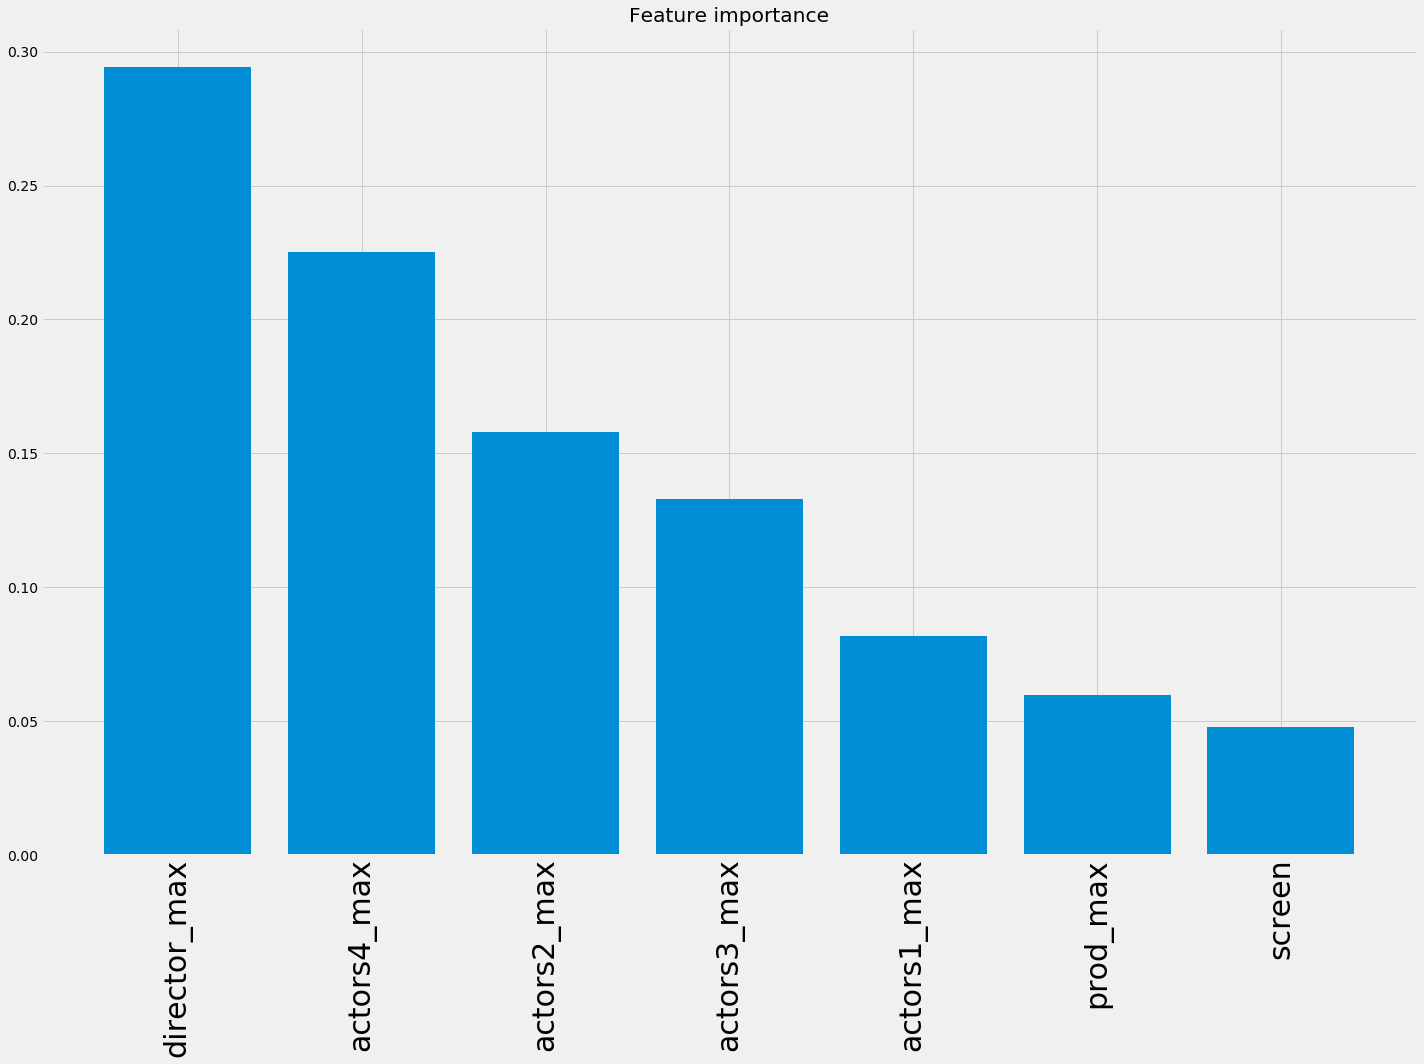

In [66]:
import numpy as np

plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(20,15))
                 
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f"%(f+1,30,feat_labels[indices[f]],
                         importances[indices[f]]))
plt.title('Feature importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90,fontsize=30)
plt.tight_layout()
plt.savefig('randomforest.png')
plt.show()

In [67]:
# 1~7 일 정도의 데이터가 제일 중요하고 이후날짜의 데이터는 크게 중요치 않음

In [68]:
df.head()

,mnumber,sum_total_people,actors1_max,actors2_max,actors3_max,actors4_max,prod_max,director_max,screen,score
0,20030371,2544096,2552870.0,6165804.0,2544096.0,2544096.0,2544096.0,2544096,74,C
1,20030410,1717703,11287394.0,6841937.0,3732836.0,6424662.0,3348591.0,4310577,15,D
2,20040490,1822588,2651870.0,1964593.0,1822588.0,0.0,5395350.0,5395350,127,D
3,20040491,1505539,4589877.0,4589877.0,0.0,0.0,1505539.0,4589877,162,D
4,20040554,1267028,3116112.0,1267028.0,1267028.0,4130782.0,1267028.0,1267028,93,D


In [69]:
df.columns

Index(['mnumber', 'sum_total_people', 'actors1_max', 'actors2_max',
       'actors3_max', 'actors4_max', 'prod_max', 'director_max', 'screen',
       'score'],
      dtype='object')

In [70]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

# y, X = dmatrices('sum_total_people ~ mnumber+ actors1_max+ actors2_max+actors3_max+ actors4_max+ actors1_avg+ actors2_avg+actors3_avg+ actors4_avg+ actors1_100cnt+ actors2_100cnt+actors3_100cnt+ actors4_100cnt+ prod_max+ prod_avg+prod_100cnt+ genre_max+ genre_avg+ genre_100cnt+ genresub_max+genresub_avg+ genresub_100cnt+ director_max+ director_avg+director_100cnt+ screen' , df, return_type = 'dataframe')
y, X = dmatrices('sum_total_people ~ mnumber+ actors1_max+ actors2_max+actors3_max+ actors4_max+  prod_max+ director_max+ screen' , df, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,551960.523478,Intercept
1,2.347047,mnumber
2,1.415313,actors1_max
3,1.381079,actors2_max
4,1.504689,actors3_max
5,1.603363,actors4_max
6,1.411851,prod_max
7,1.553189,director_max
8,2.643410,screen


['Malgun Gothic']


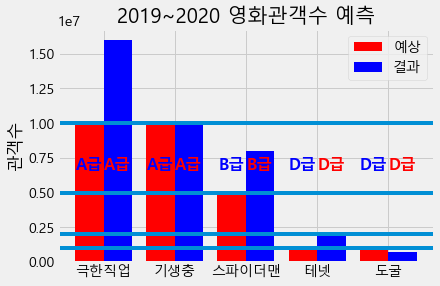

In [136]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import font_manager, rc
# matplotlib 폰트설정
# plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rc('font', family='Malgun Gothic') # For Windows
print(plt.rcParams['font.family'])

plt.style.use('fivethirtyeight')

xLabel = ['극한직업','기생충','스파이더맨','테넷','도굴']
x = pd.Series([1,2,3,4,5])
pred = [10000000,10000000,5000000,1000000,1000000]
result = [16000000,10000000,8000000,1900000,700000]

plt.xticks(x+0.2, xLabel)
plt.bar(x,pred,color='r', width =0.4, label='예상')
plt.bar(x+0.4,result,color='b', width =0.4, label='결과')
plt.legend()

plt.ylabel('관객수')
plt.title('2019~2020 영화관객수 예측')


font1 = {
      'color':  'blue',
      'weight': 'bold',
      'size': 16}
font2 = {
      'color':  'red',
      'weight': 'bold',
      'size': 16}

plt.text(1, 7000000, 'A급', va='center', ha='center', fontdict=font1)
plt.text(2, 7000000, 'A급', va='center', ha='center', fontdict=font1)
plt.text(3, 7000000, 'B급', va='center', ha='center', fontdict=font1)
plt.text(4, 7000000, 'D급', va='center', ha='center', fontdict=font1)
plt.text(5, 7000000, 'D급', va='center', ha='center', fontdict=font1)


plt.text(1.4, 7000000, 'A급', va='center', ha='center', fontdict=font2)
plt.text(2.4, 7000000, 'A급', va='center', ha='center', fontdict=font2)
plt.text(3.4, 7000000, 'B급', va='center', ha='center', fontdict=font2)
plt.text(4.4, 7000000, 'D급', va='center', ha='center', fontdict=font2)
plt.text(5.4, 7000000, 'D급', va='center', ha='center', fontdict=font2)

plt.axhline(y=10000000, xmin=0, xmax=1)
plt.axhline(y=5000000, xmin=0, xmax=1)
plt.axhline(y=2000000, xmin=0, xmax=1)
plt.axhline(y=1000000, xmin=0, xmax=1)

plt.savefig('pred1.png')
plt.show()

['Malgun Gothic']


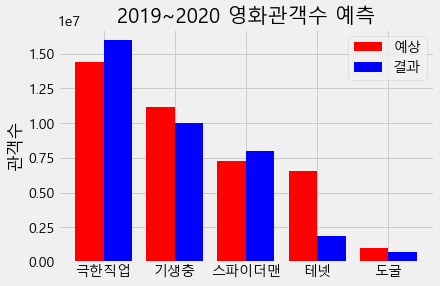

In [137]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import font_manager, rc
# matplotlib 폰트설정
# plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rc('font', family='Malgun Gothic') # For Windows
print(plt.rcParams['font.family'])

plt.style.use('fivethirtyeight')

xLabel = ['극한직업','기생충','스파이더맨','테넷','도굴']
x = pd.Series([1,2,3,4,5])
pred = [14401147,11181178,7249898,6573512,1001207]
result = [16000000,10000000,8000000,1900000,700000]

plt.xticks(x+0.2, xLabel)
plt.bar(x,pred,color='r', width =0.4, label='예상')
plt.bar(x+0.4,result,color='b', width =0.4, label='결과')
plt.legend()

plt.ylabel('관객수')
plt.title('2019~2020 영화관객수 예측')


font1 = {
      'color':  'blue',
      'weight': 'bold',
      'size': 16}
font2 = {
      'color':  'red',
      'weight': 'bold',
      'size': 16}

# plt.text(1, 7000000, 'A급', va='center', ha='center', fontdict=font1)
# plt.text(2, 7000000, 'A급', va='center', ha='center', fontdict=font1)
# plt.text(3, 7000000, 'B급', va='center', ha='center', fontdict=font1)
# plt.text(4, 7000000, 'D급', va='center', ha='center', fontdict=font1)
# plt.text(5, 7000000, 'D급', va='center', ha='center', fontdict=font1)


# plt.text(1.4, 7000000, 'A급', va='center', ha='center', fontdict=font2)
# plt.text(2.4, 7000000, 'A급', va='center', ha='center', fontdict=font2)
# plt.text(3.4, 7000000, 'B급', va='center', ha='center', fontdict=font2)
# plt.text(4.4, 7000000, 'D급', va='center', ha='center', fontdict=font2)
# plt.text(5.4, 7000000, 'D급', va='center', ha='center', fontdict=font2)

# plt.axhline(y=10000000, xmin=0, xmax=1)
# plt.axhline(y=5000000, xmin=0, xmax=1)
# plt.axhline(y=2000000, xmin=0, xmax=1)
# plt.axhline(y=1000000, xmin=0, xmax=1)
plt.savefig('pred2.png')

plt.show()